In [ ]:
#@title
# Importamos modulos 

import pandas as pd
import seaborn as sns
import numpy as np


In [ ]:
# Cargamos dataset

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.isna().sum()
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Preguntas que queremos responder

Pensar dos caracteristicas que podrian influir en la chance de sobrevivir.

In [ ]:
# Completar!

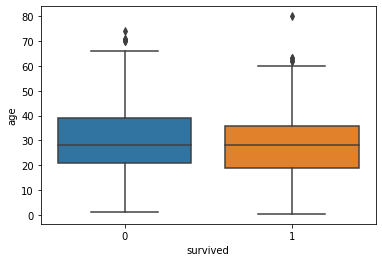

In [ ]:
# Pregunta 1: Edad:

sns.boxplot(data=titanic, x="survived", y="age")

In [ ]:
# Pregunta 2: Sexo

# No podemos hacer el mismo grafico. Pensemos que necesitamos. Pasar a pizarra.

In [ ]:
# como hacerlo manualmente:
sexo = "male"
sobrevivio = 0
data = titanic[(titanic["survived"]==sobrevivio) & (titanic["sex"] == sexo)]
#display (data.head()) # Notar los indices para ver que faltan entradas del original.
indicesSM = data.index
#display (indicesSM)
#display (len(indicesSM)) # Este es el numero que nos interesa.
#print (f'En el grupo correspondiente a sexo: {sexo} y variable sobrevivio: {sobrevivio} hay {len(indicesSM)} elementos')

# Hay que repetirlo a mano para cada combinacion!
for sexo in titanic["sex"].unique():
  for sobrevivio in titanic["survived"].unique():
    cantidad = len(titanic[(titanic["survived"]==sobrevivio) & (titanic["sex"] == sexo)].index)
    print (f'En el grupo correspondiente a sexo: {sexo} y variable sobrevivio: {sobrevivio} hay {cantidad} elementos')


En el grupo correspondiente a sexo: male y variable sobrevivio: 0 hay 468 elementos
En el grupo correspondiente a sexo: male y variable sobrevivio: 1 hay 109 elementos
En el grupo correspondiente a sexo: female y variable sobrevivio: 0 hay 81 elementos
En el grupo correspondiente a sexo: female y variable sobrevivio: 1 hay 233 elementos


In [ ]:
# Obvio que alguien ya penso en esto!

datos_agrupados = titanic.groupby(["sex","survived"])
# datos_agrupados.groups
datos_agrupados.groups

{('female', 0): [14, 18, 24, 38, 40, 41, 49, 71, 100, 111, 113, 114, 119, 132, 140, 147, 167, 177, 180, 199, 205, 229, 235, 240, 246, 251, 254, 264, 276, 293, 297, 312, 357, 362, 374, 396, 402, 404, 409, 415, 419, 423, 436, 474, 485, 498, 501, 502, 503, 534, 541, 542, 564, 567, 578, 593, 610, 617, 634, 638, 642, 654, 657, 678, 680, 702, 729, 736, 767, 772, 792, 799, 807, 813, 816, 852, 854, 863, 882, 885, 888], ('female', 1): [1, 2, 3, 8, 9, 10, 11, 15, 19, 22, 25, 28, 31, 32, 39, 43, 44, 47, 52, 53, 56, 58, 61, 66, 68, 79, 82, 84, 85, 88, 98, 106, 109, 123, 128, 133, 136, 141, 142, 151, 156, 161, 166, 172, 184, 186, 190, 192, 194, 195, 198, 208, 211, 215, 216, 218, 230, 233, 237, 241, 247, 255, 256, 257, 258, 259, 268, 269, 272, 274, 275, 279, 289, 290, 291, 299, 300, 303, 306, 307, 309, 310, 311, 315, 316, 318, 319, 322, 323, 325, 327, 328, 329, 330, 334, 337, 341, 345, 346, 347, ...], ('male', 0): [0, 4, 5, 6, 7, 12, 13, 16, 20, 26, 27, 29, 30, 33, 34, 35, 37, 42, 45, 46, 48, 50, 51

In [ ]:
# Que quiero hacer ahora con los grupos? Puedo aplicar operaciones que sean de agregacion

datos_agrupados.count() # Ojo con los nans!
#datos_agrupados.mean()
datos_agrupados


In [ ]:
# Como hacemos para verlo en modo tabla de doble entrada?

datos = datos_agrupados.count()
datos
#datos.reset_index()
#datos.reset_index().pivot("sex","survived",["pclass"]) # Aca primer y segundo argumento es categorias de doble entrada, tercero contenido

# O directamente:

#titanic.pivot_table("age","survived","sex") # Aca el orden de los argumentos cambia! Y por default hace promedio
#display (titanic.pivot_table("pclass","survived","sex", aggfunc="count"))


# Y ahora lo graficamos!
#sns.heatmap(titanic.pivot_table("pclass","survived","sex", aggfunc="count"), annot=True, fmt='g')

pclass  age  sibsp  parch  ...  deck  embark_town  alive  alone
sex    survived                             ...                                 
female 0             81   64     81     81  ...     6           81     81     81
       1            233  197    233    233  ...    91          231    233    233
male   0            468  360    468    468  ...    61          468    468    468
       1            109   93    109    109  ...    45          109    109    109

[4 rows x 13 columns]

In [ ]:
datos_agrupados.mean()

pclass        age     sibsp  ...       fare  adult_male     alone
sex    survived                                 ...                                 
female 0         2.851852  25.046875  1.209877  ...  23.024385    0.000000  0.333333
       1         1.918455  28.847716  0.515021  ...  51.938573    0.000000  0.424893
male   0         2.476496  31.618056  0.440171  ...  21.960993    0.959402  0.741453
       1         2.018349  27.276022  0.385321  ...  40.821484    0.807339  0.587156

[4 rows x 7 columns]

# Fin de la intro conceptual

# Inicio de extras

## Extras de groupby

In [ ]:
# Obviamente se puede agrupar con una sola columna como etiqueta
# Por ejemplo queremos saber el precio promedio de cada categoria
titanic.groupby("pclass")["fare"].mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

In [ ]:
# Podemos calcular porcentajes del total de una variable separando por otra variable
# Podemos por ejemplo calcular que porcentaje de la plata recaudada provino de los pasajes de cada categoria.
titanic["unos"] = 1
titanic.groupby("pclass")["fare","unos"].sum()/titanic[["fare","unos"]].sum()*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,fare,unos
pclass,,
1,63.349288,24.242424
2,13.249629,20.650954
3,23.401084,55.106622


In [ ]:
# Que pasa con los nans? No los agrupa!
# Veamos que pasa si agrupamos por deck:
titanic.groupby("deck").size() #size() indica el tamaño de cada grupo
# Ver como reemplazar los nans!
#titanic["deck"] = titanic["deck"].cat.add_categories("Sin Datos")
#titanic["deck"]
titanic["deck"] = titanic["deck"].fillna("Sin Datos")
titanic.groupby("deck").size() #size() indica el tamaño de cada grupo

deck
A             15
B             47
C             59
D             33
E             32
F             13
G              4
Sin Datos    688
dtype: int64

In [ ]:
# Podemos armarnos un dict para agrupamientos mas arbitrarios
# Queremos separar entre los que embarcaron por decks A,C,E,G como puertas pares y los que lo hicieron por B,D,F como impares

tipo_puerta = {
    "A":"Puerta Par",
    "B":"Puerta Impar",
    "C":"Puerta Par",
    "D":"Puerta Impar",
    "E":"Puerta Par",
    "F":"Puerta Impar",
    "G":"Puerta Par"
}
# Para eso primero tenemos que elegir el index porque el dict busca en el indice
titanic.index = titanic["deck"]
titanic.groupby(tipo_puerta).size()
titanic = titanic.reset_index(drop=True)

Series([], dtype: int64)

In [ ]:
# Podemos hacer un funcion que devuelva el grupo
# Por ejemplo queremos distinguir la puerta A de la B del resto.
def micriterio (puerta):
  tipo_puerta = {
    "A":"Puerta A",
    "B":"Puerta B",
    "Sin Datos":"Sin Datos"
  }
  if puerta in tipo_puerta:
    result = tipo_puerta[puerta]
  else:
    result = "Otra puerta"
  return result

#titanic.index = titanic["deck"]
display (titanic.head())
titanic.groupby(micriterio,axis=0).size()
#titanic = titanic.reset_index(drop=True)
#display (titanic.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Otra puerta    891
dtype: int64

In [ ]:
# Podemos elegir mas de un criterio de agregacion
# Por ejemplo queremos promedio, minimo y maximo de fare y age para cada categoria de pasaje y sexo
titanic.groupby(["pclass","sex"])[["age","fare"]].aggregate(['min', np.median, max])


age                  fare                    
                min median   max      min    median       max
pclass sex                                                   
1      female  2.00   35.0  63.0  25.9292  82.66455  512.3292
       male    0.92   40.0  80.0   0.0000  41.26250  512.3292
2      female  2.00   28.0  57.0  10.5000  22.00000   65.0000
       male    0.67   30.0  70.0   0.0000  13.00000   73.5000
3      female  0.75   21.5  63.0   6.7500  12.47500   69.5500
       male    0.42   25.0  74.0   0.0000   7.92500   69.5500

In [ ]:
# Y podemos aplicar diferentes agregaciones a diferentes columnas usando un dict
titanic.groupby(["pclass","sex"])[["age","fare"]].aggregate({'age': 'mean', 'fare': 'max'}) # Ojo que aca no muestra que calcula!


age      fare
pclass sex                        
1      female  34.611765  512.3292
       male    41.281386  512.3292
2      female  28.722973   65.0000
       male    30.740707   73.5000
3      female  21.750000   69.5500
       male    26.507589   69.5500

In [ ]:
# Podemos hacer transformaciones en un grupo considerando propiedades del grupo.
# Vamos a transformar la edad de los hombre y mujeres por la edad promedio de los hombres y mujeres y lo guardamos como columna nueva.
titanic["edad_media_por_genero"] = titanic.groupby("sex")["age"].transform(lambda grp: grp.mean())
# O podemos reemplazar en cada grupo por el primer valor que encuentre en el grupo
titanic["edad_primera_encontrada"] = titanic.groupby("sex")["age"].transform(lambda grp: grp.iloc[0])
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,edad_media_por_genero,edad_primera_encontrada
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,30.726645,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,27.915709,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,27.915709,38.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,27.915709,38.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,30.726645,22.0


In [ ]:
# Podemos filtrar grupos segun un griterio de los grupos como un todo.
# Vamos a agrupar por categoria de pasaje y sexo y vamos a quedarnos con los grupos cuya edad promedio sea menor a 30 años
titanic.groupby(["sex","age"]).filter(lambda grp: grp['age'].mean() < 30).head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,edad_media_por_genero,edad_primera_encontrada
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,30.726645,22.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,27.915709,38.0
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,30.726645,22.0
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,27.915709,38.0
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,27.915709,38.0
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,27.915709,38.0
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,30.726645,22.0
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True,27.915709,38.0
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False,30.726645,22.0
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True,27.915709,38.0


In [ ]:
# Obviamente podemos hacer un apply como si cada grupo fuera un dataframe
# Por ejemplo queremos describir la tabla separando en generos
titanic.groupby("sex").apply(lambda grp: grp.describe())

survived  ...  edad_primera_encontrada
sex                       ...                         
female count  314.000000  ...                    314.0
       mean     0.742038  ...                     38.0
       std      0.438211  ...                      0.0
       min      0.000000  ...                     38.0
       25%      0.000000  ...                     38.0
       50%      1.000000  ...                     38.0
       75%      1.000000  ...                     38.0
       max      1.000000  ...                     38.0
male   count  577.000000  ...                    577.0
       mean     0.188908  ...                     22.0
       std      0.391775  ...                      0.0
       min      0.000000  ...                     22.0
       25%      0.000000  ...                     22.0
       50%      0.000000  ...                     22.0
       75%      0.000000  ...                     22.0
       max      1.000000  ...                     22.0

[16 rows x 8 columns]

## Extras de pivot

In [ ]:
# Podemos segmentar dentro de una misma categoria
# Por ejemplo queremos ver cuatos pasajes hay que pagaron diferente a lo esperado para cada categoria.

# Primero queremos tener un buen criterio de separacion de bins
display (titanic.groupby(["pclass"])["fare"].mean())
bins = [0,17,30,titanic["fare"].max()]
#display (pd.cut(titanic["fare"],bins))
titanic.pivot_table("fare","pclass",pd.cut(titanic["fare"],bins), aggfunc="count") # usamos who porque no tiene nans, es lo mismo cual usamos mientras solo contemos items

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

fare,"(0.0, 17.0]","(17.0, 30.0]","(30.0, 512.329]"
pclass,,,
1,1,41,169
2,93,61,24
3,387,59,41


In [ ]:
# Podemos segmentar dentro de una misma categoria
# O podemos ver como se dividen en cuartiles los precios segun categoria haciendo el conteo de cada cuartil separando por edad y sexo

age_categories = pd.cut(titanic.age, [0, 18, 80])
fare_categories = pd.qcut(titanic.fare, 4)
fare_categories
titanic.pivot_table('survived', ['sex', age_categories], [fare_categories, 'class'],aggfunc="mean")
